In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.options.display.max_columns = None
import seaborn as sns

In [2]:
GLOBAL_RANDOM_STATE = 158

In [3]:
%ls

 Том в устройстве E имеет метку Новый том
 Серийный номер тома: C01F-4EE3

 Содержимое папки E:\GeekBrains\Python для Data Science\GeekBrains_AI_Python_for_data_science\CourseProject

19.02.2019  22:05    <DIR>          .
19.02.2019  22:05    <DIR>          ..
19.02.2019  14:40    <DIR>          .ipynb_checkpoints
19.02.2019  14:40         3 106 438 cleanovik.ipynb
19.02.2019  22:05         3 541 632 cleanovik_copy_01.ipynb
18.02.2019  14:52    <DIR>          Kurs_project_task
16.02.2019  16:09           533 979 Kurs_project_task.zip
13.02.2019  23:39           500 428 test.csv
26.01.2019  15:30           500 428 test11.csv
18.02.2019  14:54           124 877 thesis.ipynb
13.02.2019  23:40         1 185 934 train.csv
26.01.2019  15:30         1 185 934 train11.csv
18.02.2019  12:09               836 tst.pkl
               9 файлов     10 680 486 байт
               4 папок  152 862 306 304 байт свободно


**Загружаем "сырые" данные**

In [4]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

**Оцениваем "сырые" данные**

In [5]:
train_raw.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
test_raw.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [7]:
train_raw.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [8]:
test_raw.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [9]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [10]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [11]:
pd.value_counts(train_raw.Ecology_2)

B    9903
A      97
Name: Ecology_2, dtype: int64

In [12]:
pd.value_counts(test_raw.Ecology_2)

B    4952
A      48
Name: Ecology_2, dtype: int64

In [13]:
pd.value_counts(train_raw.Ecology_3)

B    9725
A     275
Name: Ecology_3, dtype: int64

In [14]:
pd.value_counts(test_raw.Ecology_3)

B    4851
A     149
Name: Ecology_3, dtype: int64

In [15]:
pd.value_counts(train_raw.Shops_2)

B    9175
A     825
Name: Shops_2, dtype: int64

In [16]:
pd.value_counts(test_raw.Shops_2)

B    4588
A     412
Name: Shops_2, dtype: int64

**!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!**  
**__!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ЕСЛИ ВЗЛЕТИТ ТО ИСПРАВИТЬ ЗДЕСЬ ОПИСАНИЕ__**  
**!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!**  
Так как **'Ecology_2', 'Ecology_3', 'Shops_2'** являются категориальными признаками, заменим их используя метод pd.get_dummies(). **Изначально** планировал конвертировать каждый из признаков в один столбец со значениями 1/0, но посчитал это менее эффективным.

In [17]:
#train_raw = pd.get_dummies(train_raw, columns=['Ecology_2', 'Ecology_3', 'Shops_2'])

In [18]:
#test_raw = pd.get_dummies(test_raw, columns=['Ecology_2', 'Ecology_3', 'Shops_2'])

In [19]:
train_raw['Ecology_2'] = (train_raw['Ecology_2'] == "A").astype(int)

In [20]:
test_raw['Ecology_2'] = (test_raw['Ecology_2'] == "A").astype(int)

In [21]:
test_raw.Ecology_2.dtype

dtype('int32')

In [22]:
pd.value_counts(test_raw.Ecology_2)

0    4952
1      48
Name: Ecology_2, dtype: int64

In [23]:
train_raw['Ecology_3'] = (train_raw['Ecology_3'] == "A").astype(int)

In [24]:
test_raw['Ecology_3'] = (test_raw['Ecology_3'] == "A").astype(int)

In [25]:
train_raw['Shops_2'] = (train_raw['Shops_2'] == "A").astype(int)

In [26]:
test_raw['Shops_2'] = (test_raw['Shops_2'] == "A").astype(int)

In [27]:
# train_raw.loc[:, [ 'Ecology_2', 'Ecology_3', 'Shops_2']].head()

In [28]:
# test_raw.loc[:, [ 'Ecology_2', 'Ecology_3', 'Shops_2']].head()

**Жилая площадь 'LifeSquare' имеет незаполненные значения, значения превышающие имеющуюся площадь 'Square', а так же наоборот, значения сильно меньше чем площадь 'Square'.**

Text(0, 0.5, 'LifeSquare')

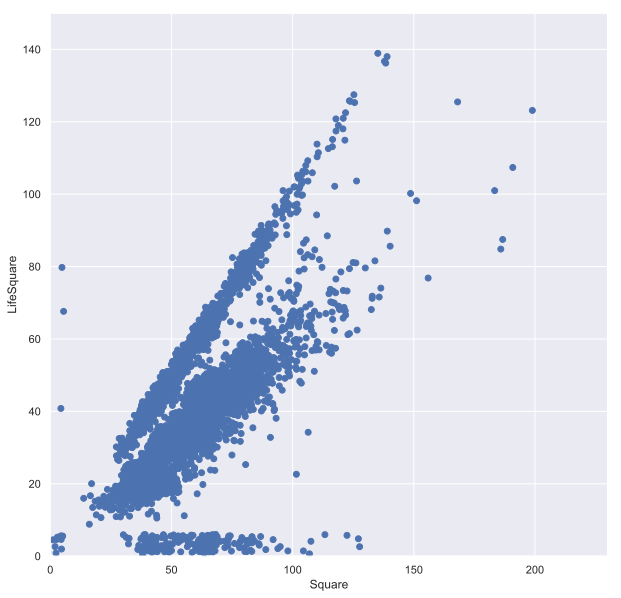

In [29]:
sns.set(rc={'figure.figsize':(10.,10.)})
plt.scatter(train_raw['Square'], train_raw['LifeSquare'])
plt.ylim(0, 150)
plt.xlim(0, 230)
plt.xlabel("Square")
plt.ylabel("LifeSquare")

**Для начала мы создадим копию данных, в которых просто зададим медианные значения жилой площади 'LifeSquare' и 'Healthcare_1' всем записям, имеющим незаполненные значения.**

In [30]:
lifesquare_median = train_raw.LifeSquare.median()
lifesquare_median

32.781260192155735

In [31]:
healthcare_1_median = train_raw.Healthcare_1.median()
healthcare_1_median

900.0

In [32]:
train_median = train_raw.copy()
test_median = test_raw.copy()

In [33]:
train_median.LifeSquare = train_median.LifeSquare.fillna(lifesquare_median)
test_median.LifeSquare = test_median.LifeSquare.fillna(lifesquare_median)

In [34]:
train_median.Healthcare_1 = train_median.Healthcare_1.fillna(healthcare_1_median)
test_median.Healthcare_1 = test_median.Healthcare_1.fillna(healthcare_1_median)

In [35]:
train_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int32
Ecology_3        10000 non-null int32
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null int32
Price            10000 non-null float64
dtypes: float64(8), int32(3), int64(9)
memory usage: 1.4 MB


In [36]:
test_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int32
Ecology_3        5000 non-null int32
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int32
dtypes: float64(7), int32(3), int64(9)
memory usage: 683.7 KB


**В качестве отправной точки получим результат на "медианных" данных, используя LinearRegression модель.**  
Так же нам понадобится разбить данные с ответами на тренировочные и валидационные.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [38]:
lr_median = LinearRegression()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred = model.predict(X_test.loc[:, feats])
    y_pred_train = model.predict(X_train.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Test data:")
    print("\tMSE: %.5f" % mse)
    print("\tMAE: %.5f" % mae)
    print("\tR2_SCORE: %.5f" % r2)
    print("Train data:")
    print("\tMSE: %.5f" % mean_squared_error(y_train, y_pred_train))
    print("\tMAE: %.5f" % mean_absolute_error(y_train, y_pred_train))
    print("\tR2_SCORE: %.5f" % r2_score(y_train, y_pred_train))
    
    return mse, mae, r2

In [41]:
X_median = train_median.drop(columns=['Price', 'Id'])
y_median = train_median.Price

In [42]:
X_train_median, X_valid_median, y_train_median, y_valid_median = train_test_split(X_median, y_median, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)

In [43]:
X_train_median.shape, X_valid_median.shape, y_train_median.shape, y_valid_median.shape

((8000, 18), (2000, 18), (8000,), (2000,))

In [44]:
mse_median, mae_median, r2_median = create_model(X_train_median, y_train_median, X_valid_median, y_valid_median, X_train_median.columns, lr_median)

Test data:
	MSE: 4396454410.44678
	MAE: 45762.76868
	R2_SCORE: 0.51792
Train data:
	MSE: 4395738870.53911
	MAE: 45120.96940
	R2_SCORE: 0.48286


**Итого, на "медианных" данных:**  
**mse_median**: 4396454410.44691   
**mae_median**: 45762.76868   
**r2_median**: 0.51792

**Наводим порядок в данных в столбцах 'Square' и 'LifeSquare':**

In [45]:
train_raw.Square.describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [46]:
train_raw.LifeSquare.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [47]:
test_raw.Square.describe()

count    5000.000000
mean       56.449500
std        19.092787
min         1.378543
25%        41.906231
50%        52.921340
75%        66.285129
max       223.453689
Name: Square, dtype: float64

In [48]:
test_raw.LifeSquare.describe()

count    3959.000000
mean       36.158810
std        17.825287
min         0.333490
25%        23.092026
50%        32.925087
75%        45.174091
max       303.071094
Name: LifeSquare, dtype: float64

In [49]:
square_fix_data = dict()

**Находим необходимые значения для 1/2/3/4 комнатных квартир:**

In [50]:
for n_rooms in range(1, 5):
    valid_by_condition = train_raw.loc[train_raw.Rooms==n_rooms].loc[(train_raw.LifeSquare>0.3*train_raw.Square) & (train_raw.LifeSquare <= train_raw.Square)]
    mean_lifesquare = valid_by_condition.LifeSquare.mean()
    mean_square = valid_by_condition.Square.mean()
    std_lifesquare = valid_by_condition.LifeSquare.std()
    std_square = valid_by_condition.Square.std()
    lifesquare_to_square_coef = mean_lifesquare / mean_square
    square_fix_data[n_rooms] = {"mean_lifesquare": mean_lifesquare, 
                                "mean_square": mean_square, 
                                "std_lifesquare": std_lifesquare, 
                                "std_square": std_square, 
                                "lifesquare_to_square_coef": lifesquare_to_square_coef}

**Функция оценки и изменения значений площади 'Square' и жилой площади 'LifeSquare':**

In [51]:
def check_valid(x, std, mean):
    coef_lower = 1.7
    coef_higher = 6
    return (mean - x < coef_lower * std) if x < mean else (x - mean < coef_higher * std)
def check_sq_and_ls(x):
    n_rooms = int(x.Rooms) if int(x.Rooms) in {1,2,3,4} else 4
    
    mean_lifesquare = square_fix_data[n_rooms]["mean_lifesquare"]
    mean_square = square_fix_data[n_rooms]["mean_square"]
    std_lifesquare = square_fix_data[n_rooms]["std_lifesquare"]
    std_square = square_fix_data[n_rooms]["std_square"]
    lifesquare_to_square_coef = square_fix_data[n_rooms]["lifesquare_to_square_coef"]
    
    valid_square = check_valid(x.Square, std_square, mean_square)
    valid_lifesquare = check_valid(x.LifeSquare, std_lifesquare, mean_lifesquare)
    
    if not valid_square and not valid_lifesquare:
        x.Square = mean_square
        x.LifeSquare = mean_lifesquare
    elif not valid_square:
        x.Square = x.LifeSquare / lifesquare_to_square_coef
    elif not valid_lifesquare:
        x.LifeSquare = x.Square * lifesquare_to_square_coef
    return x

In [52]:
train_raw = train_raw.apply(check_sq_and_ls, axis=1)
test_raw = test_raw.apply(check_sq_and_ls, axis=1)

**Вроде стало получше:**

Text(0, 0.5, 'LifeSquare')

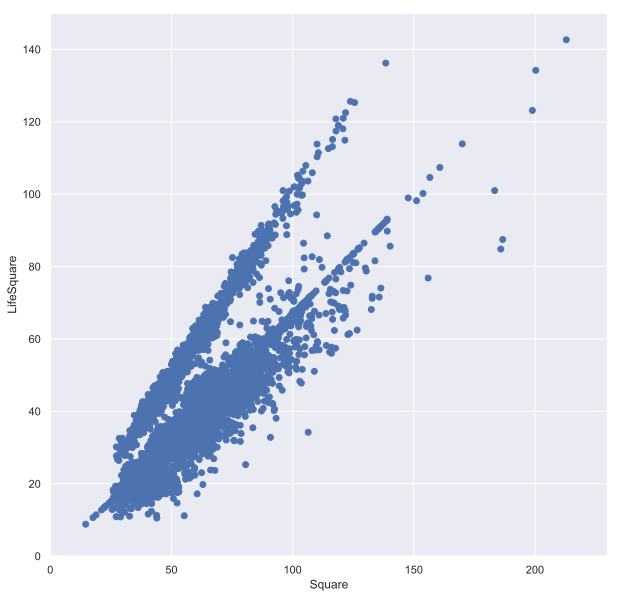

In [53]:
plt.scatter(train_raw['Square'], train_raw['LifeSquare'])
plt.ylim(0, 150)
plt.xlim(0, 230)
plt.xlabel("Square")
plt.ylabel("LifeSquare")

In [54]:
train_raw.Square.describe()

count    10000.000000
mean        56.080982
std         18.461816
min         14.609163
25%         41.752869
50%         52.621648
75%         65.930206
max        212.932361
Name: Square, dtype: float64

In [55]:
train_raw.LifeSquare.describe()

count    10000.000000
mean        37.059730
std         15.608226
min          8.822988
25%         24.551156
50%         33.746356
75%         45.325559
max        142.651454
Name: LifeSquare, dtype: float64

In [56]:
test_raw.Square.describe()

count    5000.000000
mean       56.432383
std        18.644811
min        15.722493
25%        41.875743
50%        53.011662
75%        66.295632
max       223.453689
Name: Square, dtype: float64

In [57]:
test_raw.LifeSquare.describe()

count    5000.000000
mean       37.347832
std        15.587342
min         9.495367
25%        24.766725
50%        34.062028
75%        45.671774
max       122.180548
Name: LifeSquare, dtype: float64

**Исправим площадь кухни 'KitchenSquare':**

In [58]:
train_raw.KitchenSquare.describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [59]:
test_raw.KitchenSquare.describe()

count    5000.000000
mean        5.976800
std         9.950018
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max       620.000000
Name: KitchenSquare, dtype: float64

In [60]:
kitchensquare_fix_data = dict()

In [61]:
for n_rooms in range(1, 5):
    valid_by_condition = train_raw.loc[(train_raw.Rooms==n_rooms) & (train_raw.KitchenSquare >= 3)]
    mean_kitchensquare = valid_by_condition.KitchenSquare.mean()
    mean_square = valid_by_condition.Square.mean()
    kitchensquare_to_square_coef = mean_kitchensquare / mean_square
    std_kitchensquare = valid_by_condition.KitchenSquare.std()
    kitchensquare_fix_data[n_rooms] = {"kitchensquare_to_square_coef": kitchensquare_to_square_coef,
                                      "std_kitchensquare": std_kitchensquare}

In [62]:
def check_kitchensquare(x):
    n_rooms = int(x.Rooms) if int(x.Rooms) in {1,2,3,4} else 4
    
    kitchensquare_to_square_coef = kitchensquare_fix_data[n_rooms]["kitchensquare_to_square_coef"]

    if x.KitchenSquare < 3 or x.KitchenSquare > (x.Square - x.LifeSquare) or x.KitchenSquare < (0.5 * x.Square * kitchensquare_to_square_coef):
        x.KitchenSquare = x.Square * kitchensquare_to_square_coef
    
    return x

In [63]:
train_raw = train_raw.apply(check_kitchensquare, axis=1)
test_raw = test_raw.apply(check_kitchensquare, axis=1)

In [64]:
train_raw.KitchenSquare.describe()

count    10000.000000
mean         8.734958
std          2.552506
min          3.000000
25%          7.000000
50%          9.000000
75%         10.000000
max         43.000000
Name: KitchenSquare, dtype: float64

In [65]:
test_raw.KitchenSquare.describe()

count    5000.000000
mean        8.667124
std         2.595517
min         3.000000
25%         7.000000
50%         9.000000
75%        10.000000
max        42.000000
Name: KitchenSquare, dtype: float64

**"Починим" поля этажности дома 'HouseFloor':**  
Квартир с этажем 'Floor' равным нулю нет, а вот значения этажности 'HouseFloor' равные нулю есть. Поэтому для таких значений мы поставим этажность равную этажу, на котором расположена квартира.

In [66]:
train_raw.loc[train_raw.Floor == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [67]:
test_raw.loc[test_raw.Floor == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [68]:
train_raw.loc[train_raw.HouseFloor == 0].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993.0,74.0,2.0,80.312926,52.324834,11.880001,14.0,0.0,1977.0,0.075779,0.0,0.0,6.0,1437.0,3.0,NaN,0.0,2.0,0.0,221244.156664
23,6641.0,54.0,3.0,118.907612,79.425122,14.332205,2.0,0.0,1977.0,0.006076,0.0,0.0,30.0,5285.0,0.0,645.0,6.0,6.0,0.0,571069.052600
26,4378.0,27.0,3.0,106.958871,71.443882,12.891996,17.0,0.0,2018.0,0.072158,0.0,0.0,2.0,629.0,1.0,NaN,0.0,0.0,1.0,337299.867936
39,9371.0,23.0,2.0,60.503248,39.418592,8.949726,16.0,0.0,1977.0,0.034656,0.0,0.0,0.0,168.0,0.0,NaN,0.0,0.0,0.0,229778.057902
44,10521.0,38.0,3.0,104.211396,106.340403,12.560836,20.0,0.0,2017.0,0.060753,0.0,0.0,15.0,2787.0,2.0,520.0,0.0,7.0,0.0,435462.048070


In [69]:
test_raw.loc[test_raw.HouseFloor == 0].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
22,12694.0,27.0,3.0,83.670032,46.358356,10.084939,8.0,0.0,2015.0,0.072158,0.0,0.0,2.0,629.0,1.0,NaN,0.0,0.0,1.0
24,8968.0,27.0,2.0,69.849239,45.507617,10.332198,3.0,0.0,1977.0,0.011654,0.0,0.0,4.0,915.0,0.0,NaN,0.0,0.0,0.0
30,2982.0,6.0,2.0,63.460684,41.345397,9.387194,13.0,0.0,1977.0,0.243205,0.0,0.0,5.0,1564.0,0.0,540.0,0.0,0.0,0.0
32,2449.0,1.0,1.0,66.426585,40.117355,16.506129,14.0,0.0,1977.0,0.007122,0.0,0.0,1.0,264.0,0.0,NaN,0.0,1.0,0.0
46,12309.0,45.0,1.0,42.899569,25.908561,10.659976,25.0,0.0,1977.0,0.195781,0.0,0.0,23.0,5212.0,6.0,NaN,3.0,2.0,0.0


In [70]:
train_raw.loc[train_raw.HouseFloor == 0, ['HouseFloor']] = train_raw.loc[train_raw.HouseFloor == 0].Floor

In [71]:
test_raw.loc[test_raw.HouseFloor == 0, ['HouseFloor']] = test_raw.loc[test_raw.HouseFloor == 0].Floor

In [72]:
train_raw.loc[train_raw.HouseFloor == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [73]:
test_raw.loc[test_raw.HouseFloor == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


**Исправляем год 'HouseYear' дома:**  
Будем считать, что дома с годом 2020 еще находятся на стадии строительства, а вот значения сильно выше, заменим на текущий 2019 год.

In [74]:
train_raw.loc[train_raw.HouseYear > 2020, ['HouseYear']] = 2019

In [75]:
test_raw.loc[test_raw.HouseYear > 2020, ['HouseYear']] = 2019

**Исправляем количество комнат 'Rooms':**

In [76]:
#train_raw.loc[(train_raw.Rooms < 1) | (train_raw.Rooms > 5), ['Rooms']] = 6

In [77]:
#test_raw.loc[(test_raw.Rooms < 1) | (test_raw.Rooms > 5), ['Rooms']] = 6

**'Helthcare_2' и 'DistrictId' тоже являются категориальными переменными, но имеют много значений. Если для 'Helthcare_2' их 7, и применение dummy метода является более-менее норльманым, то для 'DistrictId' их уже больше двухсот, и применение данного метода сделает размерность данных очень большой, но сильно разреженной, что может повредить точности.**  
Для решения данной проблемы я решил применить метод BinaryEncoded из пакета **'Category Encoders'**.  
Ознакомиться с документацией можно здесь: http://contrib.scikit-learn.org/categorical-encoding/  
Так же, из-за того, что в test данных присутствует несколько значений 'DistrictId', которых нет в train данных, для тренировки энкодера буду использовать конкатенированные данные.

In [78]:
train_raw.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [79]:
test_raw.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

In [80]:
test_raw['Price'] = 0

In [81]:
test_raw_copy = test_raw.copy()

In [82]:
tmp_concatenated_data = pd.concat([train_raw[train_raw.columns], test_raw_copy[train_raw.columns]])

In [83]:
tmp_concatenated_data.shape

(15000, 20)

In [84]:
tmp_concatenated_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,7825.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,8393.136933,50.693600,1.897000,56.198116,37.155764,8.712347,8.561800,12.850333,1984.712333,0.119196,0.009667,0.028267,24.769267,5370.404933,8.113667,1144.162428,1.319467,4.235133,0.082467,142759.238266
std,4850.111673,43.786257,0.839229,18.523134,15.601339,2.567036,5.323113,6.542700,18.469277,0.119371,0.097846,0.165739,17.532278,4013.364403,23.841946,1029.296278,1.489012,4.796545,0.275084,126256.734739
min,0.000000,0.000000,0.000000,14.609163,8.822988,3.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4188.750000,20.000000,1.000000,41.787090,24.667451,7.000000,4.000000,9.000000,1974.000000,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,0.000000
50%,8378.500000,37.000000,2.000000,52.751939,33.841284,9.000000,7.000000,14.000000,1977.000000,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,153860.591184
75%,12594.250000,75.000000,2.000000,66.068044,45.450310,10.000000,12.000000,17.000000,2001.000000,0.195781,0.000000,0.000000,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,215564.596644
max,16798.000000,212.000000,19.000000,223.453689,142.651454,43.000000,78.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [85]:
#import category_encoders as ce

In [86]:
#helthcare2_districtid_encoder = ce.BinaryEncoder(cols=['DistrictId','Helthcare_2'])

In [87]:
#tmp_concatenated_data = helthcare2_districtid_encoder.fit_transform(tmp_concatenated_data)

In [88]:
train_raw_columns_order = train_raw.columns.tolist()
#train_raw = helthcare2_districtid_encoder.transform(train_raw)

In [89]:
#test_raw = helthcare2_districtid_encoder.transform(test_raw)

**При желании, используя натренированный энкдоер данные можно вернуть в изначальное состояние:**

In [90]:
#train_raw.head(5)

In [91]:
#helthcare2_districtid_encoder.inverse_transform(train_raw.head(5))[train_raw_columns_order]

**Интереса ради я решил, что признак 'Healthcare_1', для тех записей где его значение 'NaN', можно заполнить натренировав модель на имеющихся данных:**

In [92]:
data_for_healthcare_1 = tmp_concatenated_data.loc[tmp_concatenated_data.Healthcare_1.notnull()]

In [93]:
data_for_healthcare_1.shape

(7825, 20)

In [94]:
healthcare_1_train_feats = data_for_healthcare_1.columns.tolist()
healthcare_1_train_feats.remove('Healthcare_1')
healthcare_1_train_feats.remove('Id')
healthcare_1_train_feats.remove('Price')
healthcare_1_train_feats

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [96]:
# parameters = [{'n_estimators': [10, 50, 100, 150, 200],
#               'max_features': np.arange(3, len(healthcare_1_train_feats) + 1),
#               'max_depth': np.arange(5, 15)}]

In [97]:
# hc1_gridsearch = GridSearchCV(estimator=RandomForestRegressor(random_state=GLOBAL_RANDOM_STATE),
#                   param_grid=parameters,
#                   cv=5,
#                   n_jobs=-1)

In [98]:
# hc1_gridsearch.fit(data_for_healthcare_1[healthcare_1_train_feats], data_for_healthcare_1['Healthcare_1'])
# hc1_gridsearch.best_params_

In [99]:
# means = hc1_gridsearch.cv_results_['mean_test_score']
# stds = hc1_gridsearch.cv_results_['std_test_score']

# for mean, std, params in zip(means, stds, hc1_gridsearch.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

**Благодаря GridSearchCV были подобраны лучшие параметры:**  
{'max_depth': 14, 'max_features': 12, 'n_estimators': 150}  
Проверим:

In [100]:
hc1_model = RandomForestRegressor(max_depth=14, max_features=12, n_estimators=150)

In [101]:
hc1_x_train, hc1_x_valid, hc1_y_train, hc1_y_valid = train_test_split(data_for_healthcare_1[healthcare_1_train_feats], data_for_healthcare_1['Healthcare_1'], test_size=0.2, random_state=GLOBAL_RANDOM_STATE)

In [102]:
hc1_model.fit(hc1_x_train, hc1_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [103]:
hc1_y_pred = hc1_model.predict(hc1_x_valid)

In [104]:
r2_score(hc1_y_valid, hc1_y_pred)

0.999758112408969

**Получился очень хороший результат предсказаний. Значит воспользуемся этой моделью чтобы заполнить в train и test данных пропущенные значения 'Healthcare_1':**

In [105]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null float64
DistrictId       10000 non-null float64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null float64
Ecology_3        10000 non-null float64
Social_1         10000 non-null float64
Social_2         10000 non-null float64
Social_3         10000 non-null float64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null float64
Shops_1          10000 non-null float64
Shops_2          10000 non-null float64
Price            10000 non-null float64
dtypes: float64(20)
memory usage: 1.5 MB


In [106]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id               5000 non-null float64
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null float64
Ecology_3        5000 non-null float64
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null float64
Price            5000 non-null int64
dtypes: float64(19), int64(1)
memory usage: 781.3 KB


In [107]:
def predict_and_paste_Healthcare_1(x):
    if np.isnan(x.Healthcare_1):
        inpt = np.array(x[healthcare_1_train_feats].tolist()).reshape(1, -1)
        x.Healthcare_1 = hc1_model.predict(inpt)
    return x

In [108]:
train_raw = train_raw.apply(predict_and_paste_Healthcare_1, axis=1)

In [109]:
test_raw = test_raw.apply(predict_and_paste_Healthcare_1, axis=1)

In [110]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null float64
DistrictId       10000 non-null float64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null float64
Ecology_3        10000 non-null float64
Social_1         10000 non-null float64
Social_2         10000 non-null float64
Social_3         10000 non-null float64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null float64
Shops_1          10000 non-null float64
Shops_2          10000 non-null float64
Price            10000 non-null float64
dtypes: float64(20)
memory usage: 1.5 MB


In [111]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id               5000 non-null float64
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null float64
Ecology_3        5000 non-null float64
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null float64
Price            5000 non-null float64
dtypes: float64(20)
memory usage: 781.3 KB


**Масштабируем необходимые колонки:**

In [112]:
train_raw.sample(5, random_state=GLOBAL_RANDOM_STATE)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4387,6318.0,6.0,2.0,75.994434,49.511285,11.241204,22.0,25.0,1977.0,0.243205,0.0,0.0,5.0,1564.0,0.0,540.000000,0.0,0.0,0.0,190746.651322
5375,2328.0,14.0,1.0,34.385302,20.087045,6.000000,1.0,5.0,1959.0,0.042032,0.0,0.0,37.0,6856.0,84.0,1940.000000,2.0,5.0,0.0,143799.070182
5363,12323.0,27.0,3.0,82.519599,55.119509,9.946275,6.0,12.0,1977.0,0.017647,0.0,0.0,2.0,469.0,0.0,114.302007,0.0,0.0,0.0,237200.056250
6930,13906.0,26.0,1.0,57.088640,23.298211,10.000000,4.0,30.0,2014.0,0.000000,0.0,0.0,36.0,6714.0,2.0,2672.000000,0.0,2.0,0.0,298237.106464
8108,10414.0,62.0,1.0,46.416929,28.032819,11.533994,8.0,8.0,1977.0,0.072158,0.0,0.0,2.0,629.0,1.0,206.057436,0.0,0.0,1.0,131240.304242


In [113]:
feats_to_scale = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1']

In [114]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [115]:
std_scaler = StandardScaler()
std_scaler.fit(train_raw[feats_to_scale])
train_std_scaled = train_raw.copy()
train_std_scaled[feats_to_scale] = std_scaler.transform(train_std_scaled[feats_to_scale])
test_raw_std_scaled = test_raw.copy()
test_raw_std_scaled[feats_to_scale] = std_scaler.transform(test_raw_std_scaled[feats_to_scale])

In [116]:
train_std_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000
mean,8383.40770,2.241762e-16,7.482237e-16,1.595390e-17,-3.890221e-16,-4.441447e-16,-1.426914e-16,-2.804423e-16,-1.436429e-15,5.593304e-17,0.009700,0.027500,-9.445500e-17,5.659084e-17,-8.172851e-16,-6.963319e-17,-1.040990e-15,-1.531331e-16,0.082500,214138.857399
std,4859.01902,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.098015,0.163543,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.275139,92872.293865
min,0.00000,-1.156369e+00,-2.252016e+00,-2.246469e+00,-1.809184e+00,-2.246907e+00,-1.436150e+00,-1.813235e+00,-4.065816e+00,-9.986406e-01,0.000000,0.000000,-1.408132e+00,-1.293905e+00,-3.373466e-01,-1.168859e+00,-8.834798e-01,-8.804019e-01,0.000000,59174.778028
25%,4169.50000,-6.974994e-01,-1.060788e+00,-7.761333e-01,-8.014492e-01,-6.797418e-01,-8.637280e-01,-5.893373e-01,-5.903975e-01,-8.503701e-01,0.000000,0.000000,-1.065895e+00,-9.454794e-01,-3.373466e-01,-7.791173e-01,-8.834798e-01,-6.723330e-01,0.000000,153872.633942
50%,8394.50000,-3.304041e-01,1.304395e-01,-1.873871e-01,-2.122945e-01,1.038411e-01,-2.913057e-01,1.755987e-01,-4.274873e-01,-3.649310e-01,0.000000,0.000000,1.785334e-02,-1.676170e-02,-2.534212e-01,-1.973537e-01,-2.139233e-01,-2.561952e-01,0.000000,192269.644879
75%,12592.50000,5.643907e-01,1.304395e-01,5.335183e-01,5.296081e-01,4.956325e-01,6.627314e-01,6.345604e-01,8.757945e-01,6.463114e-01,0.000000,0.000000,6.452869e-01,4.679386e-01,-1.275331e-01,4.030609e-01,4.556332e-01,3.680115e-01,0.000000,249135.462171
max,16798.00000,3.638814e+00,2.038131e+01,8.496414e+00,6.765471e+00,1.342475e+01,6.386954e+00,1.593328e+01,1.907559e+00,3.386085e+00,1.000000,1.000000,2.812784e+00,3.427056e+00,5.579395e+00,4.506837e+00,3.133859e+00,3.905183e+00,1.000000,633233.466570


In [117]:
test_raw_std_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,8412.595400,0.020154,0.023229,0.019035,0.018459,-0.026577,0.020092,-0.000857,-0.026044,0.008540,0.009600,0.029800,0.014077,0.013663,0.009374,0.006745,-0.000067,0.002393,0.082400,0.0
std,4832.674037,1.013630,0.998957,1.009963,0.998712,1.016901,1.046241,1.002846,1.008585,1.008826,0.097518,0.170052,1.000026,1.004996,1.001388,1.019987,0.990903,0.994021,0.275001,0.0
min,1.000000,-1.156369,-2.252016,-2.186161,-1.766103,-2.246907,-1.436150,-1.813235,-4.174423,-0.998641,0.000000,0.000000,-1.408132,-1.293905,-0.337347,-1.168859,-0.883480,-0.880402,0.000000,0.0
25%,4221.750000,-0.674556,-1.060788,-0.769477,-0.787637,-0.679742,-0.863728,-0.589337,-0.644701,-0.834728,0.000000,0.000000,-1.065895,-0.945479,-0.337347,-0.779117,-0.883480,-0.672333,0.000000,0.0
50%,8320.500000,-0.307461,0.130439,-0.166261,-0.192069,0.103841,-0.291306,0.022612,-0.427487,-0.392373,0.000000,0.000000,0.017853,-0.016762,-0.253421,-0.197354,-0.213923,-0.256195,0.000000,0.0
75%,12598.250000,0.610278,0.130439,0.553313,0.551791,0.495633,0.662731,0.634560,0.821491,0.646311,0.000000,0.000000,0.645287,0.482914,-0.127533,0.410497,0.455633,0.368011,0.000000,0.0
max,16795.000000,3.707644,17.998858,9.066339,5.453860,13.032958,13.256022,13.179512,1.907559,3.386085,1.000000,1.000000,2.812784,3.427056,5.579395,4.506837,3.133859,3.905183,1.000000,0.0


In [118]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train_raw[feats_to_scale])
train_minmax_scaled = train_raw.copy()
train_minmax_scaled[feats_to_scale] = minmax_scaler.transform(train_minmax_scaled[feats_to_scale])
test_raw_minmax_scaled = test_raw.copy()
test_raw_minmax_scaled[feats_to_scale] = minmax_scaler.transform(test_raw_minmax_scaled[feats_to_scale])

In [119]:
train_minmax_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,0.241152,0.099500,0.209112,0.210992,0.143374,0.183578,0.102174,0.680656,0.227754,0.009700,0.027500,0.333608,0.274077,0.057016,0.205941,0.219917,0.183970,0.082500,214138.857399
std,4859.01902,0.208553,0.044185,0.093090,0.116629,0.063813,0.127833,0.056352,0.167418,0.228076,0.098015,0.163543,0.236927,0.211832,0.169020,0.176199,0.248933,0.208971,0.275139,92872.293865
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,0.095694,0.052632,0.136866,0.117525,0.100000,0.073171,0.068966,0.581818,0.033815,0.000000,0.000000,0.081081,0.073804,0.000000,0.068668,0.000000,0.043478,0.000000,153872.633942
50%,8394.50000,0.172249,0.105263,0.191669,0.186234,0.150000,0.146341,0.112069,0.609091,0.144527,0.000000,0.000000,0.337838,0.270526,0.014184,0.171169,0.166667,0.130435,0.000000,192269.644879
75%,12592.50000,0.358852,0.105263,0.258775,0.272756,0.175000,0.268293,0.137931,0.827273,0.375155,0.000000,0.000000,0.486486,0.373196,0.035461,0.276956,0.333333,0.260870,0.000000,249135.462171
max,16798.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,633233.466570


In [120]:
test_raw_minmax_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,8412.595400,0.245355,0.100526,0.210884,0.213145,0.141678,0.186146,0.102126,0.676296,0.229702,0.009600,0.029800,0.336943,0.276971,0.058600,0.207129,0.219900,0.184470,0.082400,0.0
std,4832.674037,0.211385,0.044137,0.094012,0.116473,0.064888,0.133737,0.056509,0.168847,0.230077,0.097518,0.170052,0.236922,0.212879,0.169247,0.179711,0.246657,0.207712,0.275001,0.0
min,1.000000,0.000000,0.000000,0.005614,0.005024,0.000000,0.000000,0.000000,-0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4221.750000,0.100478,0.052632,0.137486,0.119136,0.100000,0.073171,0.068966,0.572727,0.037383,0.000000,0.000000,0.081081,0.073804,0.000000,0.068668,0.000000,0.043478,0.000000,0.0
50%,8320.500000,0.177033,0.105263,0.193636,0.188592,0.150000,0.146341,0.103448,0.609091,0.138268,0.000000,0.000000,0.337838,0.270526,0.014184,0.171169,0.166667,0.130435,0.000000,0.0
75%,12598.250000,0.368421,0.105263,0.260617,0.275343,0.175000,0.268293,0.137931,0.818182,0.375155,0.000000,0.000000,0.486486,0.376368,0.035461,0.278267,0.333333,0.260870,0.000000,0.0
max,16795.000000,1.014354,0.894737,1.053051,0.847036,0.975000,1.878049,0.844828,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [121]:
robust_scaler = RobustScaler()
robust_scaler.fit(train_raw[feats_to_scale])
train_robust_scaled = train_raw.copy()
train_robust_scaled[feats_to_scale] = robust_scaler.transform(train_robust_scaled[feats_to_scale])
test_raw_robust_scaled = test_raw.copy()
test_raw_robust_scaled[feats_to_scale] = robust_scaler.transform(test_raw_robust_scaled[feats_to_scale])

In [122]:
train_robust_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,8383.40770,0.261833,-0.109500,0.143082,0.159493,-0.088347,0.190837,-0.143475,0.291563,0.243827,0.009700,0.027500,-0.010433,0.011859,1.207840,0.166941,0.15975,0.246260,0.082500,214138.857399
std,4859.01902,0.792502,0.839512,0.763600,0.751320,0.850835,0.655144,0.817103,0.682073,0.668178,0.098015,0.163543,0.584420,0.707540,4.766375,0.845938,0.74680,0.961268,0.275139,92872.293865
min,0.00000,-0.654545,-2.000000,-1.572236,-1.199715,-2.000000,-0.750000,-1.625000,-2.481481,-0.423410,0.000000,0.000000,-0.833333,-0.903585,-0.400000,-0.821792,-0.50000,-0.600000,0.000000,59174.778028
25%,4169.50000,-0.290909,-1.000000,-0.449544,-0.442622,-0.666667,-0.375000,-0.625000,-0.111111,-0.324344,0.000000,0.000000,-0.633333,-0.657072,-0.400000,-0.492112,-0.50000,-0.400000,0.000000,153872.633942
50%,8394.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,192269.644879
75%,12592.50000,0.709091,0.000000,0.550456,0.557378,0.333333,0.625000,0.375000,0.888889,0.675656,0.000000,0.000000,0.366667,0.342928,0.600000,0.507888,0.50000,0.600000,0.000000,249135.462171
max,16798.00000,3.145455,17.000000,6.630619,5.242273,11.333333,4.375000,12.875000,1.592593,2.506222,1.000000,1.000000,1.633333,2.436518,27.800000,3.979257,2.50000,4.000000,1.000000,633233.466570


In [123]:
test_raw_robust_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.0
mean,8412.595400,0.277804,-0.090000,0.157616,0.173361,-0.110959,0.204000,-0.144175,0.273800,0.249533,0.009600,0.029800,-0.002207,0.021526,1.252520,0.172646,0.15970,0.248560,0.082400,0.0
std,4832.674037,0.803263,0.838594,0.771169,0.750315,0.865172,0.685403,0.819387,0.687894,0.674042,0.097518,0.170052,0.584407,0.711039,4.772752,0.862803,0.73997,0.955473,0.275001,0.0
min,1.000000,-0.654545,-2.000000,-1.526188,-1.167349,-2.000000,-0.750000,-1.625000,-2.555556,-0.423410,0.000000,0.000000,-0.833333,-0.903585,-0.400000,-0.821792,-0.50000,-0.600000,0.000000,0.0
25%,4221.750000,-0.272727,-1.000000,-0.444462,-0.432245,-0.666667,-0.375000,-0.625000,-0.148148,-0.313892,0.000000,0.000000,-0.633333,-0.657072,-0.400000,-0.492112,-0.50000,-0.400000,0.000000,0.0
50%,8320.500000,0.018182,0.000000,0.016131,0.015195,0.000000,0.000000,-0.125000,0.000000,-0.018335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,12598.250000,0.745455,0.000000,0.565570,0.574044,0.333333,0.625000,0.375000,0.851852,0.675656,0.000000,0.000000,0.366667,0.353523,0.600000,0.514179,0.50000,0.600000,0.000000,0.0
max,16795.000000,3.200000,15.000000,7.065792,4.256882,11.000000,8.875000,10.625000,1.592593,2.506222,1.000000,1.000000,1.633333,2.436518,27.800000,3.979257,2.50000,4.000000,1.000000,0.0


**Получим еще раз модель с помощью линейной регрессии на "исправленных" данных и сравним метрики с предыдущим результатом:**

In [124]:
feats_to_train = train_raw.columns.tolist()
feats_to_train.remove('Id')
feats_to_train.remove('Price')

In [125]:
X_train_std_scaled, X_valid_std_scaled, y_train_std_scaled, y_valid_std_scaled = train_test_split(train_std_scaled[feats_to_train], train_std_scaled['Price'], test_size=0.2, random_state=GLOBAL_RANDOM_STATE)
X_train_std_scaled.shape, X_valid_std_scaled.shape, y_train_std_scaled.shape, y_valid_std_scaled.shape

((8000, 18), (2000, 18), (8000,), (2000,))

In [126]:
X_train_minmax_scaled, X_valid_minmax_scaled, y_train_minmax_scaled, y_valid_minmax_scaled = train_test_split(train_minmax_scaled[feats_to_train], train_minmax_scaled['Price'], test_size=0.2, random_state=GLOBAL_RANDOM_STATE)
X_train_minmax_scaled.shape, X_valid_minmax_scaled.shape, y_train_minmax_scaled.shape, y_valid_minmax_scaled.shape

((8000, 18), (2000, 18), (8000,), (2000,))

In [127]:
X_train_robust_scaled, X_valid_robust_scaled, y_train_robust_scaled, y_valid_robust_scaled = train_test_split(train_robust_scaled[feats_to_train], train_robust_scaled['Price'], test_size=0.2, random_state=GLOBAL_RANDOM_STATE)
X_train_robust_scaled.shape, X_valid_robust_scaled.shape, y_train_robust_scaled.shape, y_valid_robust_scaled.shape

((8000, 18), (2000, 18), (8000,), (2000,))

In [128]:
X_train_raw, X_valid_raw, y_train_raw, y_valid_raw = train_test_split(train_raw[feats_to_train], train_raw['Price'], test_size=0.2, random_state=GLOBAL_RANDOM_STATE)
X_train_raw.shape, X_valid_raw.shape, y_train_raw.shape, y_valid_raw.shape

((8000, 18), (2000, 18), (8000,), (2000,))

In [129]:
lr_std_scaled = LinearRegression()
mse_std_scaled, mae_std_scaled, r2_std_scaled = create_model(X_train_std_scaled, y_train_std_scaled, X_valid_std_scaled, y_valid_std_scaled, X_train_std_scaled.columns, lr_std_scaled)

Test data:
	MSE: 4309752177.26506
	MAE: 45293.24358
	R2_SCORE: 0.52743
Train data:
	MSE: 3965324176.65679
	MAE: 43774.91719
	R2_SCORE: 0.53350


**По сравнению с линейной регрессией на "медианных" данных, метрики MAE, MSE и R2 немного улучшились.**

**Попробуем применить RandomForestRegressor c кросс-валидацией для "медианных" данных:**  

In [130]:
scaler_median_std = StandardScaler()

In [131]:
X_median_scaled = scaler_median_std.fit_transform(X_median)
X_median_scaled = pd.DataFrame(X_median_scaled, columns=X_median.columns)
y_median_scaled = y_median

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [132]:
X_train_median_scaled, X_valid_median_scaled, y_train_median_scaled, y_valid_median_scaled = train_test_split(X_median_scaled, y_median_scaled, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)

**Благодаря GridSearchCV были подобраны лучшие параметры:**  
{'max_depth': 25, 'max_features': 4, 'n_estimators': 500}  
Проверим:

In [133]:
# parameters = [{'n_estimators': [500, 750, 1000],
#               'max_features': np.arange(3, 11),
#               'max_depth': np.arange(10, 30)}]
# print(parameters)
# median_gridsearch = GridSearchCV(estimator=RandomForestRegressor(random_state=GLOBAL_RANDOM_STATE),
#                   param_grid=parameters,
#                   cv=5,
#                   n_jobs=-1)
# start_time = time.time()
# median_gridsearch.fit(X_median_scaled, y_median_scaled)
# print("Train time: %.3f" % (time.time()-start_time))
# median_gridsearch.best_params_

In [134]:
# clf = median_gridsearch
# means_test = clf.cv_results_['mean_test_score']
# stds_test = clf.cv_results_['std_test_score']

# means_train = clf.cv_results_['mean_train_score']
# stds_train = clf.cv_results_['std_train_score']

# for mean_tst, std_tst, mean_trn, std_trn, params in zip(means_test, stds_test, means_train, stds_train, clf.cv_results_['params']):
#     print("Test: %0.3f (+/-%0.03f); Train: %0.3f (+/-%0.03f); Params: %r" % (mean_tst, std_tst * 2, mean_trn, std_trn * 2, params))

In [135]:
RFR_median_scaled = RandomForestRegressor(max_depth=25, max_features=4, n_estimators=500, n_jobs=-1, random_state=GLOBAL_RANDOM_STATE, min_samples_leaf=2)

In [136]:
mse_rfr_median_scaled, mae_rfr_median_scaled, r2_rfr_median_scaled = create_model(X_train_median_scaled, y_train_median_scaled, X_valid_median_scaled, y_valid_median_scaled, X_train_median_scaled.columns, RFR_median_scaled)

Test data:
	MSE: 2302542754.15215
	MAE: 28359.73224
	R2_SCORE: 0.74752
Train data:
	MSE: 705803806.80805
	MAE: 15638.67818
	R2_SCORE: 0.91697


Text(0.5, 1.0, 'RFR на "медианных" данных')

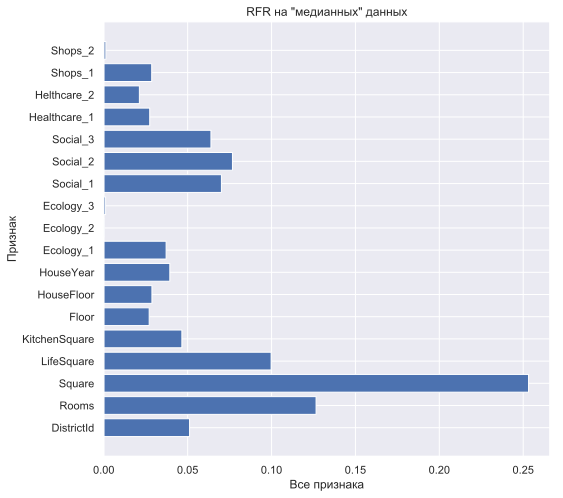

In [137]:
sns.set(rc={'figure.figsize':(8.,8.)})
plt.barh(X_train_median_scaled.columns, RFR_median_scaled.feature_importances_)
plt.xlabel('Все признака')
plt.ylabel('Признак')
plt.title('RFR на "медианных" данных')

**Попробуем применить ExtraTreesRegressor c кросс-валидацией для "медианных" данных:**

In [138]:
from sklearn.ensemble import ExtraTreesRegressor

In [139]:
# parameters = [{'n_estimators': [500, 750, 1000],
#               'max_features': np.arange(3, 8),
#               'max_depth': np.arange(20, 30)}]
# print(parameters)
# median_gridsearch2 = GridSearchCV(estimator=ExtraTreesRegressor(random_state=GLOBAL_RANDOM_STATE),
#                   param_grid=parameters,
#                   cv=5,
#                   n_jobs=-1)
# start_time = time.time()
# median_gridsearch2.fit(X_median_scaled, y_median_scaled)
# print("Train time: %.3f" % (time.time()-start_time))
# median_gridsearch2.best_params_

**Полученное лучшее значение параметров для ExtraTreesRegressor:**  
{'max_depth': 20, 'max_features': 6, 'n_estimators': 1000}

In [140]:
# clf = median_gridsearch2
# means_test = clf.cv_results_['mean_test_score']
# stds_test = clf.cv_results_['std_test_score']

# means_train = clf.cv_results_['mean_train_score']
# stds_train = clf.cv_results_['std_train_score']

# for mean_tst, std_tst, mean_trn, std_trn, params in zip(means_test, stds_test, means_train, stds_train, clf.cv_results_['params']):
#     print("Test: %0.3f (+/-%0.03f); Train: %0.3f (+/-%0.03f); Params: %r" % (mean_tst, std_tst * 2, mean_trn, std_trn * 2, params))

In [141]:
ETR_median_scaled = ExtraTreesRegressor(n_estimators=1000, max_depth=20, max_features=6, random_state=GLOBAL_RANDOM_STATE, n_jobs=-1, min_samples_leaf=2)

In [142]:
mse_etr_median_scaled, mae_etr_median_scaled, r2_etr_median_scaled = create_model(X_train_median_scaled, y_train_median_scaled, X_valid_median_scaled, y_valid_median_scaled, X_train_median_scaled.columns, ETR_median_scaled)

Test data:
	MSE: 2417341548.70649
	MAE: 28943.29506
	R2_SCORE: 0.73494
Train data:
	MSE: 711342100.31485
	MAE: 16412.88015
	R2_SCORE: 0.91631


Text(0.5, 1.0, 'ETR на "медианных" данных')

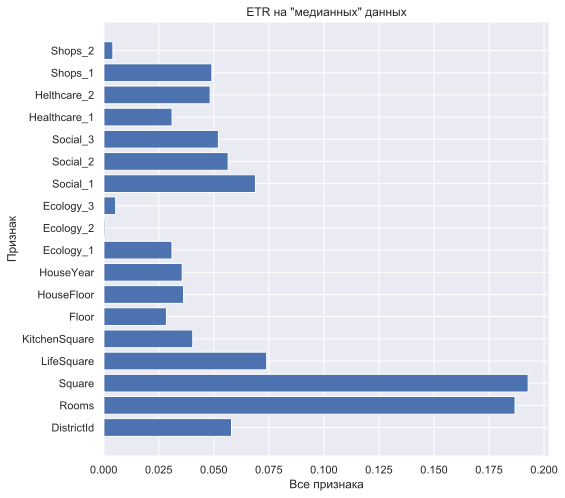

In [143]:
plt.barh(X_train_median_scaled.columns, ETR_median_scaled.feature_importances_)
plt.xlabel('Все признака')
plt.ylabel('Признак')
plt.title('ETR на "медианных" данных')

**По сравнению с линейной регрессией на "медианных" данных, метрики MAE, MSE и R2 ощутимо улучшились.**

**Попытка определить "удачную" модель для тренировочных данных, путем перебора:**

In [144]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [145]:
data = train_raw.copy()

In [146]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(len(feats_to_train), 'Price').index
columns

Index(['Price', 'Square', 'Rooms', 'LifeSquare', 'DistrictId', 'Social_1',
       'Helthcare_2', 'Social_2', 'Healthcare_1', 'Shops_1', 'KitchenSquare',
       'Floor', 'HouseFloor', 'Social_3', 'Ecology_3', 'HouseYear', 'Id',
       'Ecology_2'],
      dtype='object')

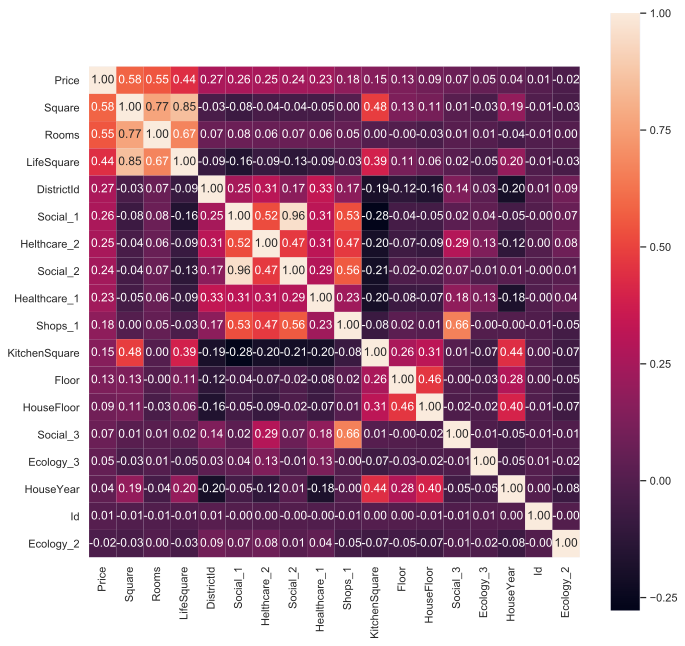

In [147]:
sns.set(rc={'figure.figsize':(11.,11.)})
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [148]:
X = data[columns]
Y = X['Price'].values
X = X.drop('Price', axis = 1).values

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=GLOBAL_RANDOM_STATE)

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [151]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledSVR_RBF', Pipeline([('Scaler', StandardScaler()),('SVR_RBF', SVR(kernel='rbf'))])))
pipelines.append(('ScaledSVR_Linear', Pipeline([('Scaler', StandardScaler()),('SVR_Linear', SVR(kernel='linear'))])))
pipelines.append(('ScaledSVR_Poly', Pipeline([('Scaler', StandardScaler()),('SVR_Poly', SVR(kernel='poly'))])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledETR', Pipeline([('Scaler', StandardScaler()),('ETR', ExtraTreesRegressor(n_estimators=100))])))
pipelines.append(('ScaledRFR', Pipeline([('Scaler', StandardScaler()),('ETR', RandomForestRegressor(n_estimators=100))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=GLOBAL_RANDOM_STATE)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.523361 (0.028734)
ScaledLASSO: 0.523361 (0.028732)
ScaledEN: 0.489652 (0.025649)
ScaledKNN: 0.624910 (0.026538)
ScaledCART: 0.432232 (0.078346)
ScaledGBM: 0.692066 (0.029255)
ScaledSVR_RBF: -0.051662 (0.011741)
ScaledSVR_Linear: 0.084302 (0.012364)
ScaledSVR_Poly: -0.050691 (0.011457)
ScaledRidge: 0.523363 (0.028729)
ScaledETR: 0.727122 (0.026170)
ScaledRFR: 0.719550 (0.030210)


**Попробуем применить RandomForestRegressor c кросс-валидацией для подготовленных, исправленных данных:**

In [152]:
X_tr, X_val, y_tr, y_val = X_train_std_scaled, X_valid_std_scaled, y_train_std_scaled, y_valid_std_scaled
#X_tr, X_val, y_tr, y_val = X_train_minmax_scaled, X_valid_minmax_scaled, y_train_minmax_scaled, y_valid_minmax_scaled
#X_tr, X_val, y_tr, y_val = X_train_robust_scaled, X_valid_robust_scaled, y_train_robust_scaled, y_valid_robust_scaled
#X_tr, X_val, y_tr, y_val = X_train_raw, X_valid_raw, y_train_raw, y_valid_raw

In [153]:
# parameters = [{'n_estimators': [250, 500, 750, 1000],
#                'max_features': np.arange(3, 15),
#               'max_depth': np.arange(15,25)
#               }]
# parameters

[{'n_estimators': [250, 500, 750, 1000],
  'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
  'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])}]

In [154]:
# kfold = KFold(n_splits=5, random_state=GLOBAL_RANDOM_STATE, shuffle=True)
# clean_data_rfr_gridsearch = GridSearchCV(estimator=RandomForestRegressor(random_state=GLOBAL_RANDOM_STATE),
#                                         param_grid=parameters,
#                                         cv=kfold,
#                                         n_jobs=-1,
#                                          verbose=1)
# start_time = time.time()
# clean_data_rfr_gridsearch.fit(X_train_std_scaled, y_train_std_scaled)
# print("Train time: %.3f" % (time.time()-start_time))
# rfr_clean_data_best_params = clean_data_rfr_gridsearch.best_params_
# rfr_clean_data_best_params

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 30.8min
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

Train time: 2611.891


{'max_depth': 20, 'max_features': 3, 'n_estimators': 1000}

**Лучшие параметры:**  
{'max_depth': 20, 'max_features': 3, 'n_estimators': 1000}

In [165]:
rfr_clean_data_best_params = {'max_depth': 20, 'max_features': 3, 'n_estimators': 1000}

In [155]:
# clf = clean_data_rfr_gridsearch
# means_test = clf.cv_results_['mean_test_score']
# stds_test = clf.cv_results_['std_test_score']

# means_train = clf.cv_results_['mean_train_score']
# stds_train = clf.cv_results_['std_train_score']

# for mean_tst, std_tst, mean_trn, std_trn, params in zip(means_test, stds_test, means_train, stds_train, clf.cv_results_['params']):
#     print("Test: %0.3f (+/-%0.03f); Train: %0.3f (+/-%0.03f); Params: %r" % (mean_tst, std_tst * 2, mean_trn, std_trn * 2, params))

Test: 0.729 (+/-0.061); Train: 0.935 (+/-0.004); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 250}
Test: 0.730 (+/-0.061); Train: 0.935 (+/-0.004); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 500}
Test: 0.730 (+/-0.060); Train: 0.935 (+/-0.004); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 750}
Test: 0.730 (+/-0.060); Train: 0.935 (+/-0.004); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 1000}
Test: 0.729 (+/-0.059); Train: 0.937 (+/-0.004); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 250}
Test: 0.729 (+/-0.061); Train: 0.937 (+/-0.004); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 500}
Test: 0.729 (+/-0.060); Train: 0.937 (+/-0.004); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 750}
Test: 0.729 (+/-0.060); Train: 0.937 (+/-0.004); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 1000}
Test: 0.727 (+/-0.061); Train: 0.937 (+/-0.004); Params: {'max_depth': 15, 'ma

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [156]:
rfr_clean_data_model = RandomForestRegressor()
rfr_clean_data_model.set_params(**rfr_clean_data_best_params)
rfr_clean_mse, rfr_clean_mae, rfr_clean_r2 = create_model(X_tr, y_tr, X_val, y_val, X_tr.columns, rfr_clean_data_model)

Test data:
	MSE: 2417225964.65907
	MAE: 28779.87830
	R2_SCORE: 0.73495
Train data:
	MSE: 342516624.99868
	MAE: 11311.32854
	R2_SCORE: 0.95970


**Попробуем применить ExtraTreesRegressor c кросс-валидацией для подготовленных, исправленных данных:**

In [157]:
# parameters = [{'n_estimators': [250, 500, 750, 1000],
#                'max_features': np.arange(3, 15),
#               'max_depth': np.arange(15,25)
#               }]
# parameters

[{'n_estimators': [250, 500, 750, 1000],
  'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
  'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])}]

In [158]:
# kfold = KFold(n_splits=5, random_state=GLOBAL_RANDOM_STATE, shuffle=True)
# clean_data_etr_gridsearch = GridSearchCV(estimator=ExtraTreesRegressor(random_state=GLOBAL_RANDOM_STATE),
#                   param_grid=parameters,
#                   cv=kfold,
#                   n_jobs=-1,
#                     verbose=1)
# start_time = time.time()
# clean_data_etr_gridsearch.fit(X_train_std_scaled, y_train_std_scaled)
# print("Train time: %.3f" % (time.time()-start_time))
# etr_clean_data_best_params = clean_data_rfr_gridsearch.best_params_
# etr_clean_data_best_params

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  6.7min
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 11.5min
[Parallel(n_jobs

Train time: 1562.053


{'max_depth': 20, 'max_features': 3, 'n_estimators': 1000}

**Лучшие параметры:**  
{'max_depth': 20, 'max_features': 3, 'n_estimators': 1000}

In [166]:
etr_clean_data_best_params = {'max_depth': 20, 'max_features': 3, 'n_estimators': 1000}

In [159]:
# clf = clean_data_etr_gridsearch
# means_test = clf.cv_results_['mean_test_score']
# stds_test = clf.cv_results_['std_test_score']

# means_train = clf.cv_results_['mean_train_score']
# stds_train = clf.cv_results_['std_train_score']

# for mean_tst, std_tst, mean_trn, std_trn, params in zip(means_test, stds_test, means_train, stds_train, clf.cv_results_['params']):
#     print("Test: %0.3f (+/-%0.03f); Train: %0.3f (+/-%0.03f); Params: %r" % (mean_tst, std_tst * 2, mean_trn, std_trn * 2, params))

Test: 0.712 (+/-0.052); Train: 0.903 (+/-0.007); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 250}
Test: 0.712 (+/-0.053); Train: 0.903 (+/-0.006); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 500}
Test: 0.712 (+/-0.054); Train: 0.902 (+/-0.005); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 750}
Test: 0.712 (+/-0.053); Train: 0.902 (+/-0.006); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 1000}
Test: 0.720 (+/-0.056); Train: 0.923 (+/-0.005); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 250}
Test: 0.720 (+/-0.056); Train: 0.922 (+/-0.005); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 500}
Test: 0.720 (+/-0.056); Train: 0.922 (+/-0.005); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 750}
Test: 0.721 (+/-0.056); Train: 0.922 (+/-0.005); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 1000}
Test: 0.723 (+/-0.055); Train: 0.934 (+/-0.006); Params: {'max_depth': 15, 'ma

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [160]:
etr_clean_data_model = ExtraTreesRegressor()
etr_clean_data_model.set_params(**etr_clean_data_best_params)
etr_clean_mse, etr_clean_mae, etr_clean_r2 = create_model(X_tr, y_tr, X_val, y_val, X_tr.columns, etr_clean_data_model)

Test data:
	MSE: 2504843744.53249
	MAE: 29297.28373
	R2_SCORE: 0.72534
Train data:
	MSE: 179337986.84587
	MAE: 8375.81902
	R2_SCORE: 0.97890


**С помощью полученных моделей RFR и ETR оценим важность признаков, используя '.feature_importances_':**

In [161]:
rfr_clean_data_model.feature_importances_

array([0.05392462, 0.10813285, 0.21084009, 0.12048061, 0.05265624,
       0.03129172, 0.03387572, 0.04766326, 0.03767306, 0.00037196,
       0.00159827, 0.06481496, 0.07049973, 0.06188768, 0.0427176 ,
       0.02639108, 0.0335402 , 0.00164034])

In [162]:
etr_clean_data_model.feature_importances_

array([0.06001689, 0.11582599, 0.18174217, 0.11427096, 0.0544899 ,
       0.03464792, 0.03914478, 0.0516537 , 0.03059632, 0.00074035,
       0.00522433, 0.06150512, 0.05809259, 0.04991891, 0.04573892,
       0.04591464, 0.04585872, 0.00461778])

Text(0.5, 1.0, 'RFR на исправленных данных')

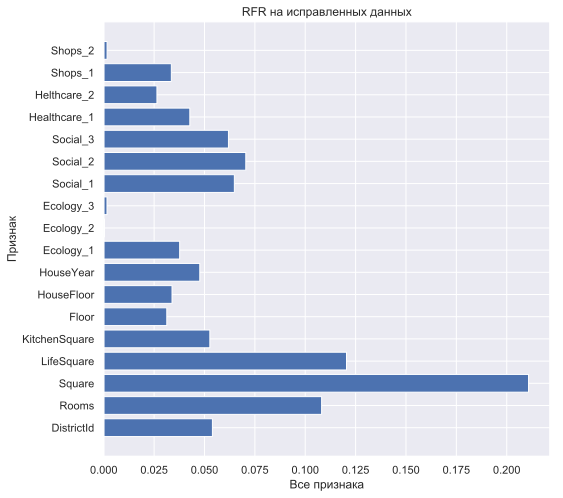

In [163]:
sns.set(rc={'figure.figsize':(8.,8.)})
plt.barh(X_tr.columns, rfr_clean_data_model.feature_importances_)
plt.xlabel('Все признака')
plt.ylabel('Признак')
plt.title('RFR на исправленных данных')

Text(0.5, 1.0, 'ETR на исправленных данных')

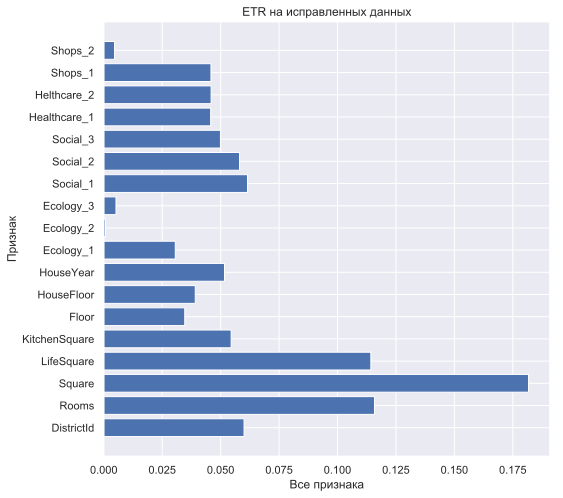

In [164]:
plt.barh(X_tr.columns, etr_clean_data_model.feature_importances_)
plt.xlabel('Все признака')
plt.ylabel('Признак')
plt.title('ETR на исправленных данных')

**Проверка версии, что _ВСЕ_ данные, включая 'Price' должны быть масштабированы:**

In [223]:
train_raw.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038.0,35.0,2.0,47.981561,29.442751,6.000000,7.0,9.0,1969.0,0.089040,0.0,0.0,33.0,7976.0,5.0,1038.733333,0.0,11.0,0.0,184966.930730
1,15053.0,41.0,3.0,65.683640,40.049543,8.000000,7.0,9.0,1978.0,0.000070,0.0,0.0,46.0,10309.0,1.0,240.000000,1.0,16.0,0.0,300009.450063
2,4765.0,53.0,2.0,44.947953,29.197612,6.648765,8.0,12.0,1968.0,0.049637,0.0,0.0,34.0,7759.0,0.0,229.000000,1.0,3.0,0.0,220925.908524
3,5809.0,58.0,2.0,53.352981,52.731512,7.892048,8.0,17.0,1977.0,0.437885,0.0,0.0,23.0,5735.0,3.0,1084.000000,0.0,5.0,0.0,175616.227217
4,10783.0,99.0,1.0,39.649192,23.776169,7.000000,11.0,12.0,1976.0,0.012339,0.0,0.0,35.0,5776.0,1.0,2078.000000,2.0,4.0,0.0,150226.531644


In [224]:
all_but_price_scaler = StandardScaler()
price_scaler = StandardScaler()
all_but_price_features = train_raw.columns.tolist()
all_but_price_features.remove('Id')
all_but_price_features.remove('Price')
#all_but_price_features

In [225]:
train_all_scaled = train_raw.copy()
train_all_scaled[all_but_price_features] = all_but_price_scaler.fit_transform(train_all_scaled[all_but_price_features])


In [226]:
train_all_scaled["Price"] = np.squeeze(price_scaler.fit_transform(train_all_scaled.Price.values.reshape(-1, 1)))

In [227]:
train_all_scaled.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038.0,-0.353348,0.130439,-0.438734,-0.488035,-1.071533,-0.291306,-0.589337,-0.861915,-0.250529,-0.09897,-0.16816,0.474169,0.654880,-0.127533,0.046966,-0.883480,1.408356,-0.299864,-0.314124
1,15053.0,-0.215687,1.321667,0.520162,0.191563,-0.287950,-0.291306,-0.589337,-0.373184,-0.998053,-0.09897,-0.16816,1.215681,1.237169,-0.295384,-0.887942,-0.213923,2.448700,-0.299864,0.924656
2,4765.0,0.059635,0.130439,-0.603060,-0.503742,-0.817353,-0.100498,-0.130376,-0.916218,-0.581588,-0.09897,-0.16816,0.531208,0.600720,-0.337347,-0.900817,-0.213923,-0.256195,-0.299864,0.073083
3,5809.0,0.174352,0.130439,-0.147772,1.004122,-0.330245,-0.100498,0.634560,-0.427487,2.680470,-0.09897,-0.16816,-0.096225,0.095553,-0.211458,0.099950,-0.883480,0.159943,-0.299864,-0.414812
4,10783.0,1.115034,-1.060788,-0.890086,-0.851104,-0.679742,0.471924,-0.130376,-0.481791,-0.894969,-0.09897,-0.16816,0.588247,0.105786,-0.295384,1.263415,0.455633,-0.048126,-0.299864,-0.688209


In [228]:
train_all_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,8383.40770,2.241762e-16,7.482237e-16,1.595390e-17,-3.890221e-16,-4.441447e-16,-1.426914e-16,-2.804423e-16,-1.436429e-15,5.593304e-17,-6.861456e-17,-1.304817e-16,-9.445500e-17,5.659084e-17,-8.172851e-16,-6.963319e-17,-1.040990e-15,-1.531331e-16,-5.780376e-16,-1.019067e-16
std,4859.01902,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,0.00000,-1.156369e+00,-2.252016e+00,-2.246469e+00,-1.809184e+00,-2.246907e+00,-1.436150e+00,-1.813235e+00,-4.065816e+00,-9.986406e-01,-9.896975e-02,-1.681596e-01,-1.408132e+00,-1.293905e+00,-3.373466e-01,-1.168859e+00,-8.834798e-01,-8.804019e-01,-2.998637e-01,-1.668655e+00
25%,4169.50000,-6.974994e-01,-1.060788e+00,-7.761333e-01,-8.014492e-01,-6.797418e-01,-8.637280e-01,-5.893373e-01,-5.903975e-01,-8.503701e-01,-9.896975e-02,-1.681596e-01,-1.065895e+00,-9.454794e-01,-3.373466e-01,-7.791173e-01,-8.834798e-01,-6.723330e-01,-2.998637e-01,-6.489474e-01
50%,8394.50000,-3.304041e-01,1.304395e-01,-1.873871e-01,-2.122945e-01,1.038411e-01,-2.913057e-01,1.755987e-01,-4.274873e-01,-3.649310e-01,-9.896975e-02,-1.681596e-01,1.785334e-02,-1.676170e-02,-2.534212e-01,-1.973537e-01,-2.139233e-01,-2.561952e-01,-2.998637e-01,-2.354879e-01
75%,12592.50000,5.643907e-01,1.304395e-01,5.335183e-01,5.296081e-01,4.956325e-01,6.627314e-01,6.345604e-01,8.757945e-01,6.463114e-01,-9.896975e-02,-1.681596e-01,6.452869e-01,4.679386e-01,-1.275331e-01,4.030609e-01,4.556332e-01,3.680115e-01,-2.998637e-01,3.768439e-01
max,16798.00000,3.638814e+00,2.038131e+01,8.496414e+00,6.765471e+00,1.342475e+01,6.386954e+00,1.593328e+01,1.907559e+00,3.386085e+00,1.010410e+01,5.946733e+00,2.812784e+00,3.427056e+00,5.579395e+00,4.506837e+00,3.133859e+00,3.905183e+00,3.334848e+00,4.512816e+00


In [218]:
# #Таким образом можно развернуть масштабированные цены обратно в "прямые"
# np.squeeze(price_scaler.inverse_transform(train_all_scaled.Price.values.reshape(-1, 1)))

In [219]:
# #Как пример. Взять масштабированные цены, вернуть их обратно в "прямые" и сравнить с ожидаемыми ценами.
# unscaled_price = np.squeeze(price_scaler.inverse_transform(train_all_scaled.Price.values.reshape(-1, 1)))
# print(unscaled_price)
# orig_price = np.squeeze(train_raw.Price.values.reshape(-1, 1))
# print(orig_price)
# r2_score(orig_price, unscaled_price)

In [235]:
X_train_std_all_scaled, X_valid_std_all_scaled, y_train_std_all_scaled, y_valid_std_all_scaled = train_test_split(train_all_scaled, train_all_scaled['Price'], test_size=0.2, random_state=GLOBAL_RANDOM_STATE)

In [236]:
rfr_all_scaled_data_model = RandomForestRegressor()
rfr_all_scaled_data_model.set_params(**rfr_clean_data_best_params)
rfr_all_scaled_mse, rfr_all_scaled_mae, rfr_all_scaled_r2 = create_model(X_train_std_all_scaled, y_train_std_all_scaled, X_valid_std_all_scaled, y_valid_std_all_scaled, all_but_price_features, rfr_all_scaled_data_model)

Test data:
	MSE: 0.27953
	MAE: 0.30955
	R2_SCORE: 0.73566
Train data:
	MSE: 0.03989
	MAE: 0.12197
	R2_SCORE: 0.95953


In [253]:
from sklearn.neural_network import MLPRegressor

In [299]:
mlpr = MLPRegressor(hidden_layer_sizes=(256, 256, 256), alpha=0.00000001, learning_rate='adaptive', 
                    learning_rate_init=0.001, max_iter=2000, shuffle=True, random_state=GLOBAL_RANDOM_STATE, 
                   early_stopping=True, validation_fraction=0.2)

In [300]:
# mlpr.fit(train_all_scaled[all_but_price_features], train_all_scaled['Price'])
mlpr.fit(X_train_std_all_scaled[all_but_price_features], y_train_std_all_scaled)

MLPRegressor(activation='relu', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(256, 256, 256), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=158, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.2, verbose=False, warm_start=False)

In [301]:
mlpr.loss_

0.051877169672470656

In [302]:
yy_pred_scaled = mlpr.predict(X_valid_std_all_scaled[all_but_price_features])

In [303]:
r2_score(y_valid_std_all_scaled, yy_pred_scaled)

0.656772421375527

In [273]:
mlpr.out_activation_

'identity'